In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import seaborn as sn

In [ ]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train = X_train / 255
X_test = X_test / 255

4


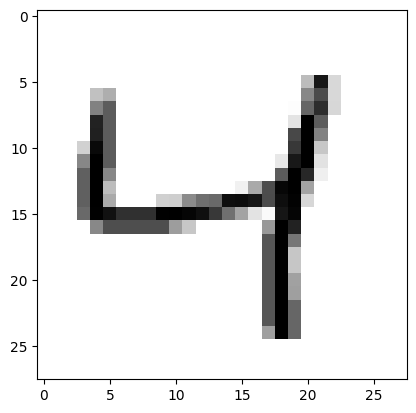

In [ ]:
index = 2
plt.imshow(X_train[index], cmap=plt.cm.binary)
print(Y_train[index])

In [ ]:
X_train_flat = X_train.reshape(len(X_train), (28 * 28))
X_test_flat = X_test.reshape(len(X_test), (28 * 28))

In [ ]:
X_train_flat.shape

(60000, 784)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(128, input_shape=(784,), activation='relu'),
    keras.layers.Dense(64, activation='sigmoid'),
    keras.layers.Dense(32, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax'),
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flat, Y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7662 - loss: 0.9526
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9613 - loss: 0.1383
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9767 - loss: 0.0826
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9823 - loss: 0.0598
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9872 - loss: 0.0440


In [ ]:
model.evaluate(X_test_flat, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9726 - loss: 0.0973


[0.07865400612354279, 0.9775999784469604]

In [ ]:
Y_pred = model.predict(X_test_flat)
Y_pred_labels = [np.argmax(i) for i in Y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<Axes: >

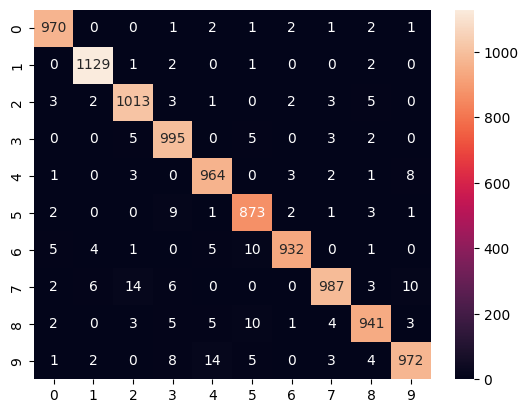

In [ ]:
confusion_matrix = tf.math.confusion_matrix(labels=Y_test, predictions=Y_pred_labels)
sn.heatmap(confusion_matrix, annot=True, fmt='d')

In [ ]:
model.save('mnist_model.h5')

In [ ]:
from google.colab import files
files.download('mnist_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>